<a href="https://colab.research.google.com/github/Hyorim-Kim/colab/blob/main/tfc50autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Auto Encoder란 입력 데이터를 압축시켜 압축시킨 데이터로 축소한 후 다시 확장하여 결과 데이터를 입력 데이터와 동일하도록 만드는 일종의 딥 뉴럴 네트워크 모델이다.
# Dense만 사용해서 모델 작성
# MNIST dataset 사용
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

In [11]:
def create_autoencoder(encoding_dim=32, image_shape=(784,)):
  # encoder
  input_img = Input(shape=image_shape)
  # encoded = Dense(encoding_dim, activation='relu')(input_img)

  encoded = Dense(encoding_dim, activation='relu')(input_img)
  encoded = Dense(64, activation='relu')(encoded)
  encoded = Dense(32, activation='relu')(encoded)


  # decoder
  # decoded = Dense(image_shape[0], activation='sigmoid')(encoded)

  decoded = Dense(32, activation='relu')(encoded)
  decoded = Dense(64, activation='relu')(decoded)
  decoded = Dense(image_shape[0], activation='sigmoid')(decoded)

  # autoencoder model
  autoencoder = Model(input_img, decoded)
  print(autoencoder.summary())
  encoder = Model(input_img, encoded)

  # decoder model
  # encoded_input = Input(shape=(encoding_dim,))
  # decoder_layer = autoencoder.layers[-1]
  # decoder = Model(encoded_input, decoder_layer(encoded_input))
  # print(decoder.summary())
  encoded_input = Input(shape=(32,))
  decoder_layer = autoencoder.layers[4](encoded_input)
  decoder_layer = autoencoder.layers[5](decoder_layer)
  decoder_layer = autoencoder.layers[6](decoder_layer)
  decoder = Model(encoded_input, decoder_layer)

  return autoencoder, encoder, decoder

def prepare_data():
  (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
  x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
  print(x_train.shape, ' ', x_test.shape)
  return x_train, x_test

def display_images(original, reconstructed, n=10):
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # original
    ax = plt.subplot(2, n, i+1)  # 2행, 10열, 1부터 10까지
    plt.imshow(original[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed
    ax = plt.subplot(2, n, i+1+n)  # 2행, 10열, 11부터 20까지
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 784)               5096

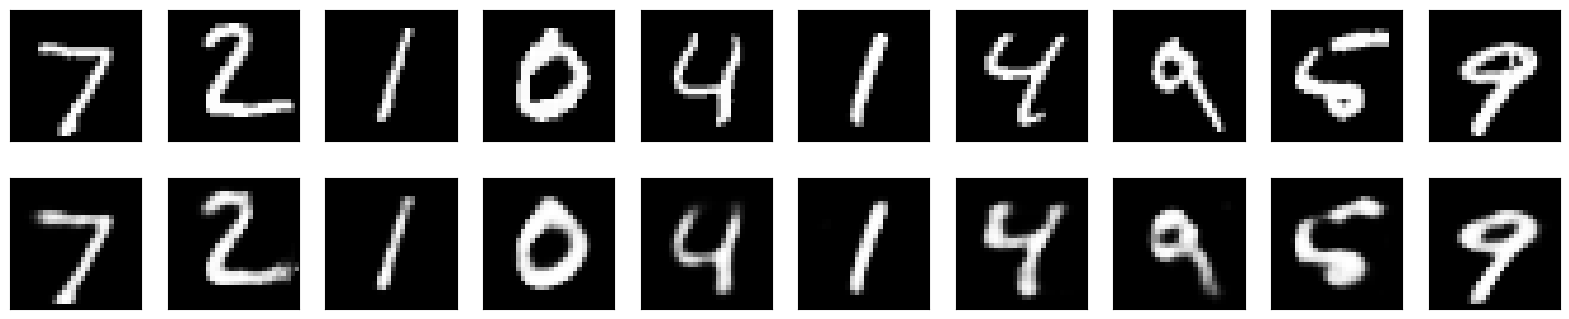

In [12]:
if __name__ == '__main__':
  # encoding_dim = 32
  encoding_dim = 128

  autoencoder, encoder, decoder = create_autoencoder(encoding_dim)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  x_train, x_test = prepare_data()

  autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=2)

  encoded_img = encoder.predict(x_test)
  decoded_img = decoder.predict(encoded_img)

  display_images(x_test, decoded_img)